# LOCAL SEARCH - ANÁLISE DE RESULTADOS

 - ITA | PG-CTE-S | TE-282 - Meta-heurísticas
 - Professor Dr. Angelo Passaro
 - Aluno: Rafael Caneiro de Oliveira
 - Versao: 0.1
 - Data: 26/10/2021

## Bibliotecas | Parâmetros | Funções

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from ast import literal_eval

PATH = Path.cwd().parent
RAW_PATH = Path(PATH, "./data/raw/") 
LOG_PATH = Path(PATH, "./data/log/")
print(LOG_PATH)


/Users/rco/github/s_metaheuristic/data/log


In [2]:
def read_port_files(n_port):
    filepath = Path(RAW_PATH, 'port' + str(n_port) + '.txt')
    with open(filepath) as fp:
        # quantidade de ativos no portfolio
        n_assets = int(fp.readline())
        # armazena as estatisticas do ativo
        r_mean = []
        r_std = []
        for n in range(n_assets):
            line = fp.readline()
            r_mean.append(float(line.strip().split()[0]))
            r_std.append(float(line.strip().split()[1]))

        # obtem o restante da matriz de covariancia
        cnt = 32
        i = []
        j = []
        cov = []
        line = fp.readline()
        while line:
            i.append(int(line.strip().split(' ')[0]))
            j.append(int(line.strip().split(' ')[1]))
            cov.append(float(line.strip().split(' ')[2]))
            line = fp.readline()
    fp.close()
    # retorna dataframe com estatisticas dos ativos do portfolio
    df_stats = pd.DataFrame({'port':n_port,
                             'i':[i_+1 for i_ in range(n_assets)],
                             'r_mean':r_mean,
                             'r_std':r_std})
    print(df_stats.shape)

    # retorna dataframe com matriz de covariancia dos ativos do portfolio
    df_cov_mx = pd.DataFrame({'port':n_port,
                             'i':i,
                             'j':j,
                             'cov':cov})
    print(df_cov_mx.shape)
    return df_stats, df_cov_mx

## Carrega Dados

In [3]:
df_stats_list = []
df_cov_mx_list =[]
for p in range(1,6,1):
    df_stats, df_cov_mx = read_port_files(p)
    df_stats_list.append(df_stats)
    df_cov_mx_list.append(df_cov_mx)
    
df_stats = pd.concat(df_stats_list)
df_cov_mx = pd.concat(df_cov_mx_list)

(31, 4)
(496, 4)
(85, 4)
(3655, 4)
(89, 4)
(4005, 4)
(98, 4)
(4851, 4)
(225, 4)
(25425, 4)


In [4]:
portfolios = {
    1:'Hang Seng - Hong Kong',
    2:'DAX - German Blue Chips',
    3:'FTSE - London',
    4:"S&P - Standard and Poor's 500 - US",
    5:'Nikkei - Tokyo'
}
df_stats['portfolio'] = df_stats.port.map(portfolios)
df_cov_mx['portfolio'] = df_cov_mx.port.map(portfolios)

In [5]:
uefs = []
for port in range(5):
    uef = pd.read_csv(Path(RAW_PATH, 'portef' + str(port+1) + '.txt'), header=None, sep='\s+')
    uef.columns = ['mean_return', 'var_return']
    uef['port'] = port + 1
    uefs.append(uef)
uef = pd.concat(uefs, ignore_index=True).reset_index(drop=True)
uef['portfolio'] = uef.port.map(portfolios)
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


In [6]:
all_dfs = []
best_dfs = []
LOGs = str(LOG_PATH) + '/*.csv'

c = 0
for file in glob.glob(str(LOGs)):
    filename = file[file.find('/log/')+5:]
    try:
        df = pd.read_csv(file, low_memory=False, sep=',', quotechar='"')
        c = c + 1
    except:
        print('Arquivo não importado: {}'.format(filename))
    df['filename'] = filename
    df['X'] = df.X.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Z'] = df.Z.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Q'] = df.Z.apply(lambda x: np.sum(np.array(x)))
    all_dfs.append(df)
    best_dfs.append(df[-1:])

all_data = pd.concat(all_dfs, ignore_index=True).reset_index(drop=True)
all_data.rename({'move_strategy':'move_str',
                 'selection_strategy':'selec_str'}, axis=1, inplace=True)

best_data = pd.concat(best_dfs, ignore_index=True).reset_index(drop=True)
best_data.rename({'move_strategy':'move_str',
                  'selection_strategy':'selec_str'}, axis=1, inplace=True)

print('Importados {} arquivos'.format(c))

all_data.head()


Importados 1639 arquivos


,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,0,0.066898,0.066898,0.001815,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
1,1,0.064629,0.064629,0.001793,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
2,2,0.064064,0.064064,0.001784,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
3,3,0.061703,0.061703,0.001762,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
4,4,0.059271,0.059271,0.001741,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0


In [7]:
all_data[all_data.obj=='[0.035848]']

,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491700 entries, 0 to 491699
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   iter        491700 non-null  int64  
 1   obj         491700 non-null  float64
 2   aug_obj     491700 non-null  float64
 3   return      491700 non-null  float64
 4   X           491700 non-null  object 
 5   Z           491700 non-null  object 
 6   max_iter    491700 non-null  int64  
 7   neighbours  491700 non-null  int64  
 8   alpha       491700 non-null  float64
 9   exp_return  491700 non-null  float64
 10  n_port      491700 non-null  int64  
 11  k           491700 non-null  int64  
 12  move_str    491700 non-null  object 
 13  seed        491700 non-null  int64  
 14  selec_str   491700 non-null  object 
 15  filename    491700 non-null  object 
 16  Q           491700 non-null  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 63.8+ MB


In [9]:
all_data.obj.value_counts()

0.001309    3840
0.000282    1800
0.005817    1500
0.005202    1500
0.002093    1500
            ... 
0.083133       1
0.083569       1
0.087469       1
0.089486       1
0.032328       1
Name: obj, Length: 98802, dtype: int64

In [10]:
all_data.iter.value_counts()

0      1639
206    1639
204    1639
203    1639
202    1639
201    1639
200    1639
199    1639
198    1639
197    1639
196    1639
195    1639
194    1639
193    1639
192    1639
191    1639
190    1639
205    1639
207    1639
188    1639
208    1639
223    1639
222    1639
221    1639
220    1639
219    1639
218    1639
217    1639
216    1639
215    1639
214    1639
213    1639
212    1639
211    1639
210    1639
209    1639
189    1639
187    1639
1      1639
168    1639
166    1639
165    1639
164    1639
163    1639
162    1639
161    1639
160    1639
159    1639
158    1639
157    1639
156    1639
155    1639
154    1639
153    1639
152    1639
167    1639
169    1639
186    1639
170    1639
185    1639
184    1639
183    1639
182    1639
181    1639
180    1639
179    1639
178    1639
177    1639
176    1639
175    1639
174    1639
173    1639
172    1639
171    1639
224    1639
225    1639
226    1639
281    1639
279    1639
278    1639
277    1639
276    1639
275    1639
274 

## Portfólios

### Geral

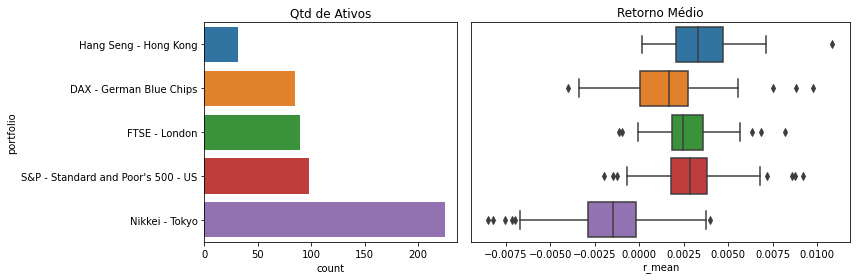

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1.5]})
sns.countplot(data=df_stats, y='portfolio', ax=ax[0])
ax[0].title.set_text('Qtd de Ativos')
sns.boxplot(data=df_stats, y='portfolio', x='r_mean', ax=ax[1])
ax[1].title.set_text("Retorno Médio")
ax[1].get_yaxis().set_ticks([])
ax[1].set_ylabel('')
fig.tight_layout()

In [64]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


### Matriz de Covariância

In [12]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j].describe().T

,count,mean,std,min,25%,50%,75%,max
port,37904.0,4.336350,1.068738,1.000000,4.000000,5.000000,5.00000,5.000000
i,37904.0,60.152728,49.736086,1.000000,20.000000,46.000000,88.00000,224.000000
j,37904.0,120.305456,62.150969,2.000000,68.000000,113.000000,178.00000,225.000000
cov,37904.0,0.388782,0.166550,-0.145815,0.258983,0.419793,0.51717,0.909412


<AxesSubplot:>

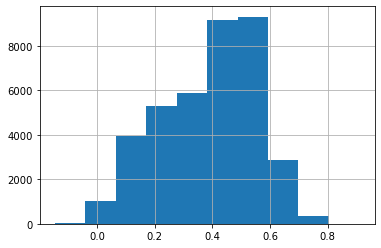

In [13]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j]['cov'].hist()

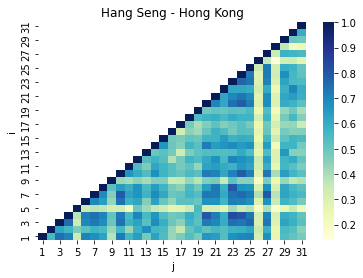

In [14]:
portfolio = 1
df_cov_pivot = df_cov_mx[df_cov_mx.port==portfolio].pivot(index='i', columns='j', values='cov')
sns.heatmap(df_cov_pivot.iloc[::-1], cmap="YlGnBu") 
plt.title(portfolios[portfolio])
ax=ax

### Fronteiras de Eficiência Irrestrira - UEF

In [15]:
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


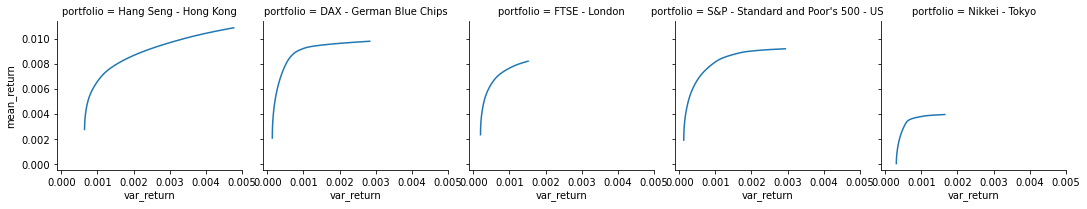

In [16]:
g = sns.relplot(data=uef, y='mean_return', x='var_return', col='portfolio', kind='line', height=3)
ax=ax

## Curvas de Aprendizado

### Avaliação do Impacto da Seed

In [17]:
all_data.head()

,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,0,0.066898,0.066898,0.001815,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
1,1,0.064629,0.064629,0.001793,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
2,2,0.064064,0.064064,0.001784,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
3,3,0.061703,0.061703,0.001762,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0
4,4,0.059271,0.059271,0.001741,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,9.0


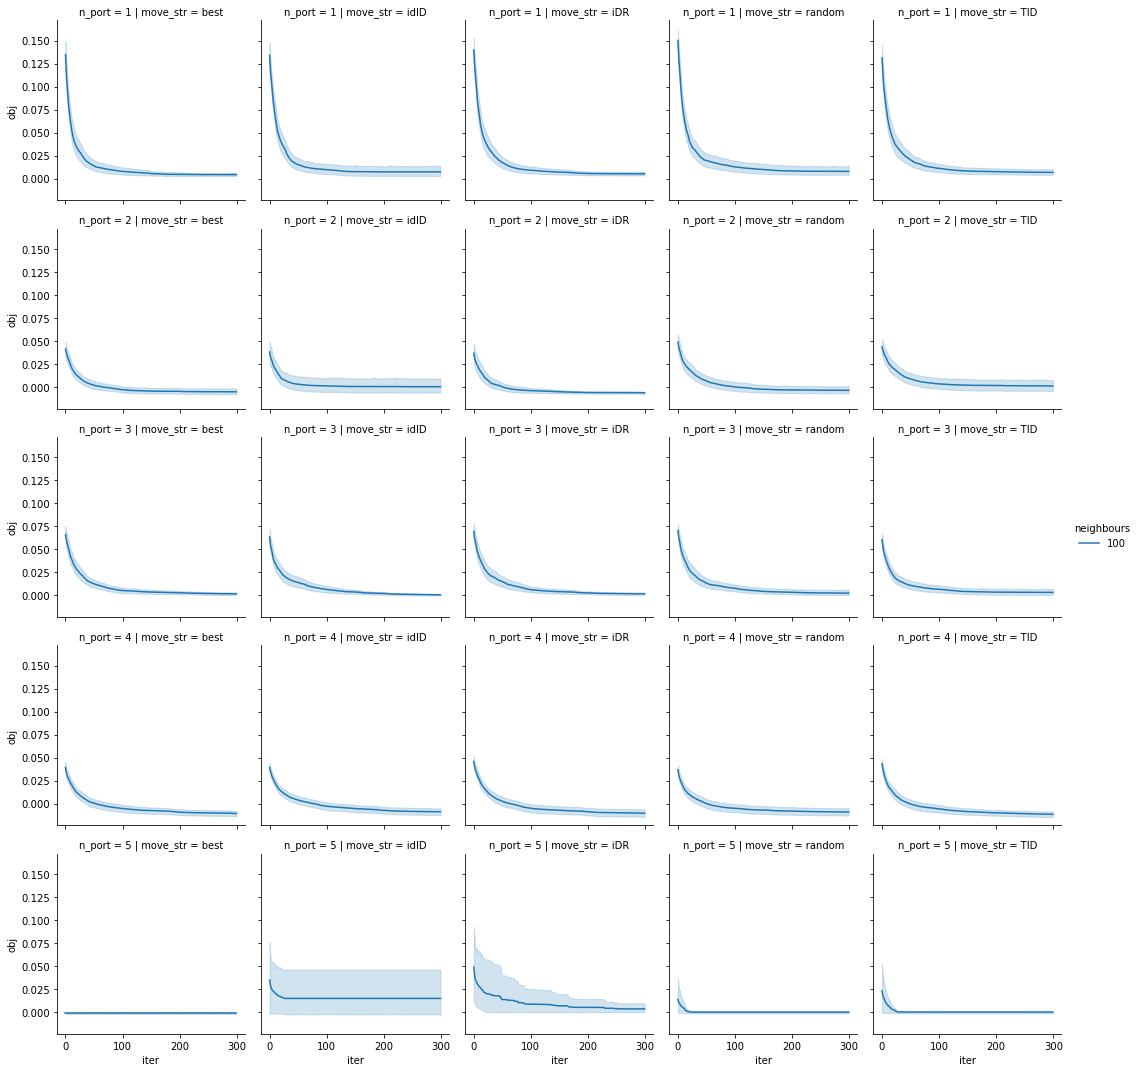

In [45]:
g = sns.FacetGrid(
    data=all_data, col='move_str', row='n_port', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

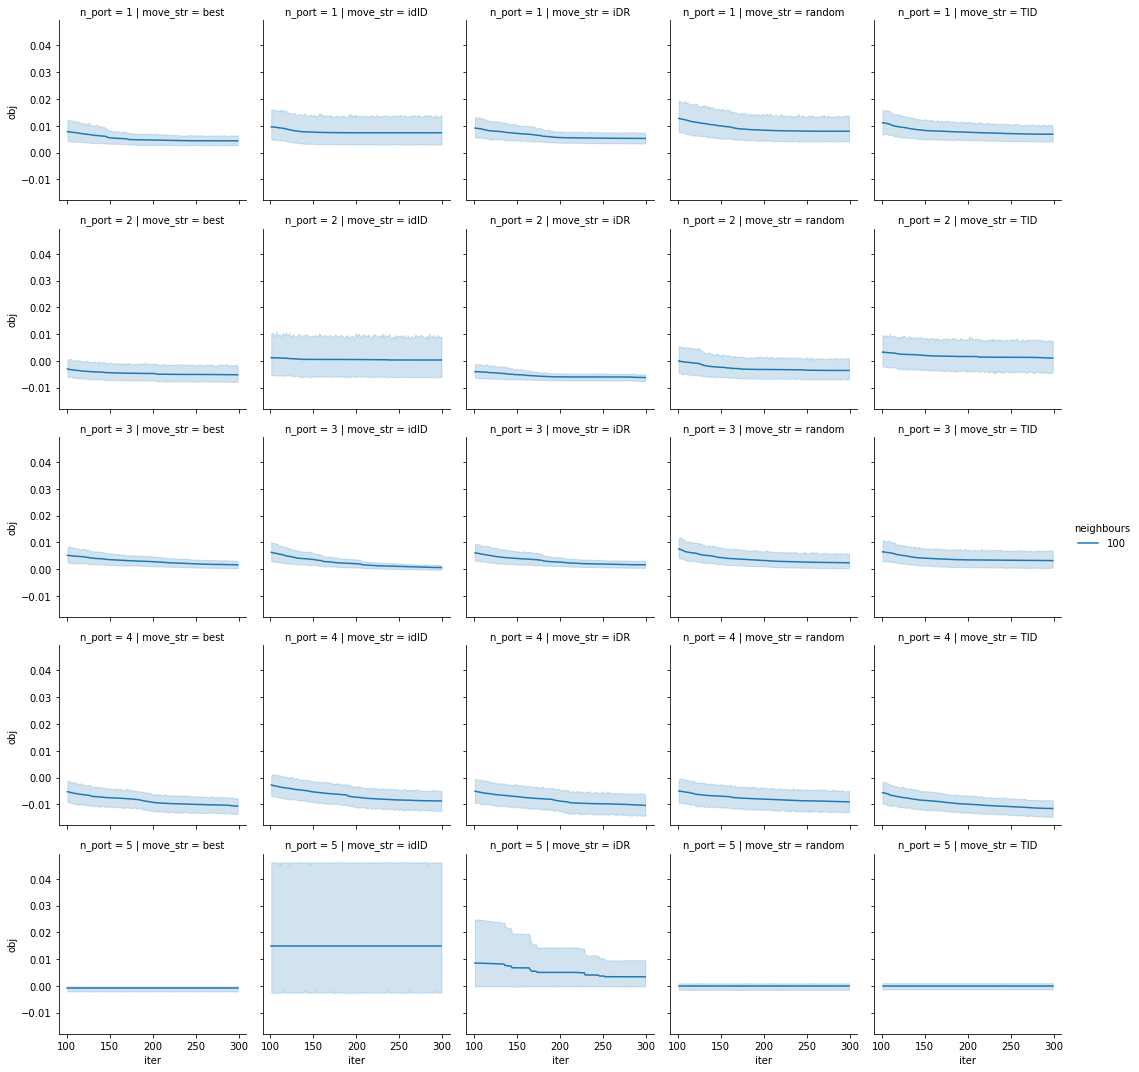

In [46]:
g = sns.FacetGrid(
    data=all_data[all_data.iter>100], col='move_str', row='n_port', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

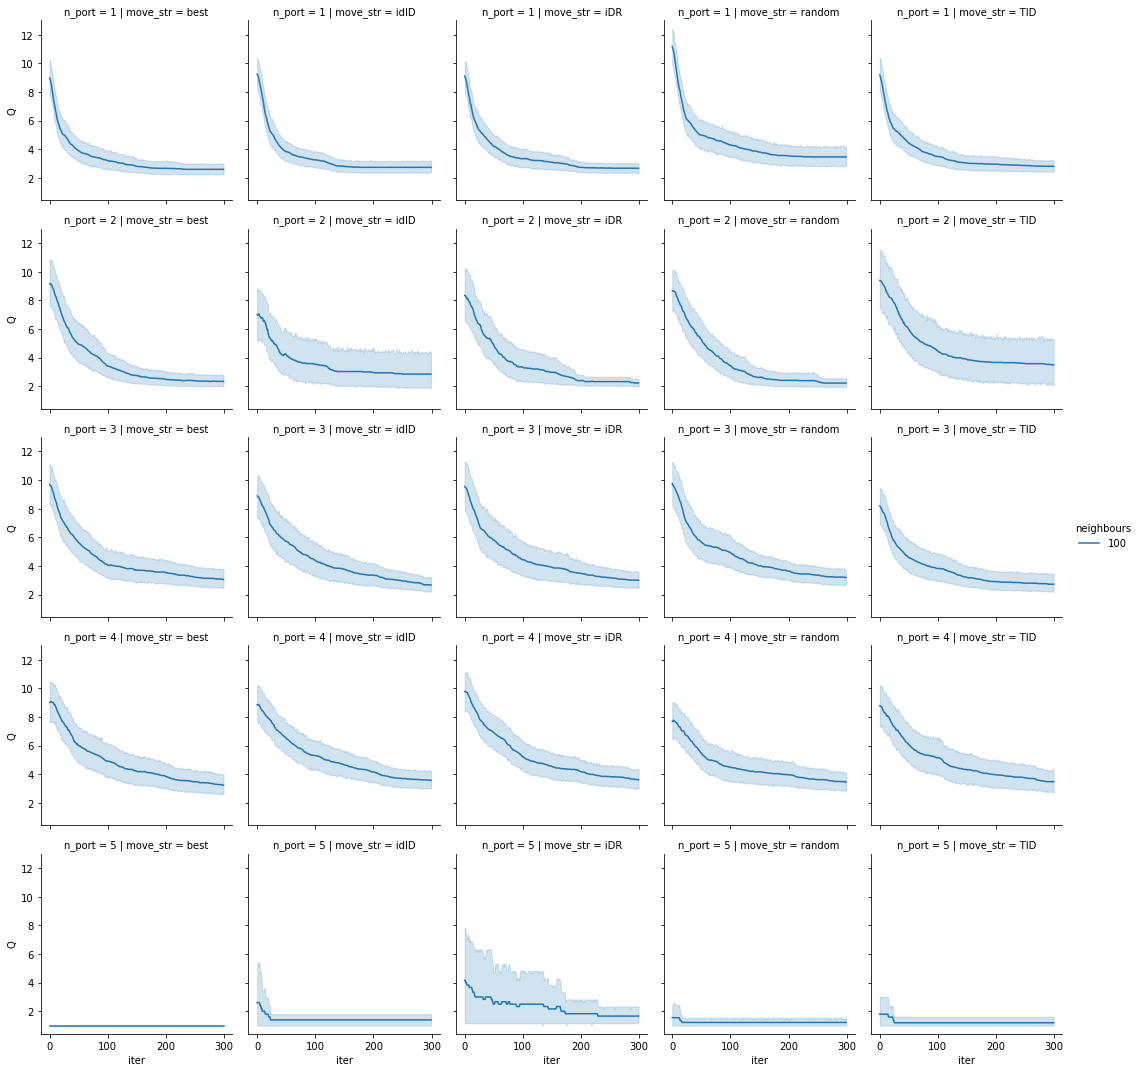

In [51]:
g = sns.FacetGrid(
    data=all_data, col='move_str', row='n_port', hue='neighbours')
g.map(sns.lineplot, 'iter', 'Q')
g.add_legend()
g=g

### Avaliação do Tipo de Move

In [21]:
# g = sns.FacetGrid(
#     data=all_data, row='selec_str', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Impacto do Retorno Experado

In [22]:
# g = sns.FacetGrid(
#     data=all_data, row='exp_return', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

## Análise Best - Portfólio 1

In [23]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [24]:
print(best_data.shape)
best_data.drop(['X', 'Z',],axis=1,).head()

(1639, 17)


,iter,obj,aug_obj,return,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,299,0.000076,0.000076,0.004014,300,100,0.1,0.001,3,9,best,46,random,log_gls_20211116_210129_536602.csv,2.0
1,299,0.002093,0.002093,0.002093,300,100,0.1,0.002,1,1,idID,31,random,log_gls_20211116_205314_432606.csv,1.0
2,299,-0.007380,-0.007380,0.004930,300,100,0.1,0.001,2,19,iDR,22,best,log_gls_20211116_205446_436177.csv,2.0
3,299,0.004033,0.004033,0.004033,300,100,0.1,0.005,3,1,idID,74,random,log_gls_20211116_205956_954158.csv,1.0
4,299,-0.004818,-0.004818,0.004364,300,100,0.1,0.001,2,21,iDR,6,first,log_gls_20211116_205033_254609.csv,2.0


In [25]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1639.0,299.000000,0.000000e+00,299.000000,299.000000,299.000000,299.000000,299.000000
obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
aug_obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
return,1639.0,0.003273,2.066357e-03,-0.004928,0.002005,0.003006,0.004470,0.010780
max_iter,1639.0,300.000000,0.000000e+00,300.000000,300.000000,300.000000,300.000000,300.000000
neighbours,1639.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.000000
alpha,1639.0,0.100000,1.388202e-17,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1639.0,0.002666,1.822134e-03,0.001000,0.001000,0.002000,0.003000,0.010000
n_port,1639.0,2.491153,1.251037e+00,1.000000,1.000000,3.000000,4.000000,5.000000
k,1639.0,9.063453,6.704444e+00,1.000000,3.000000,8.000000,13.000000,31.000000


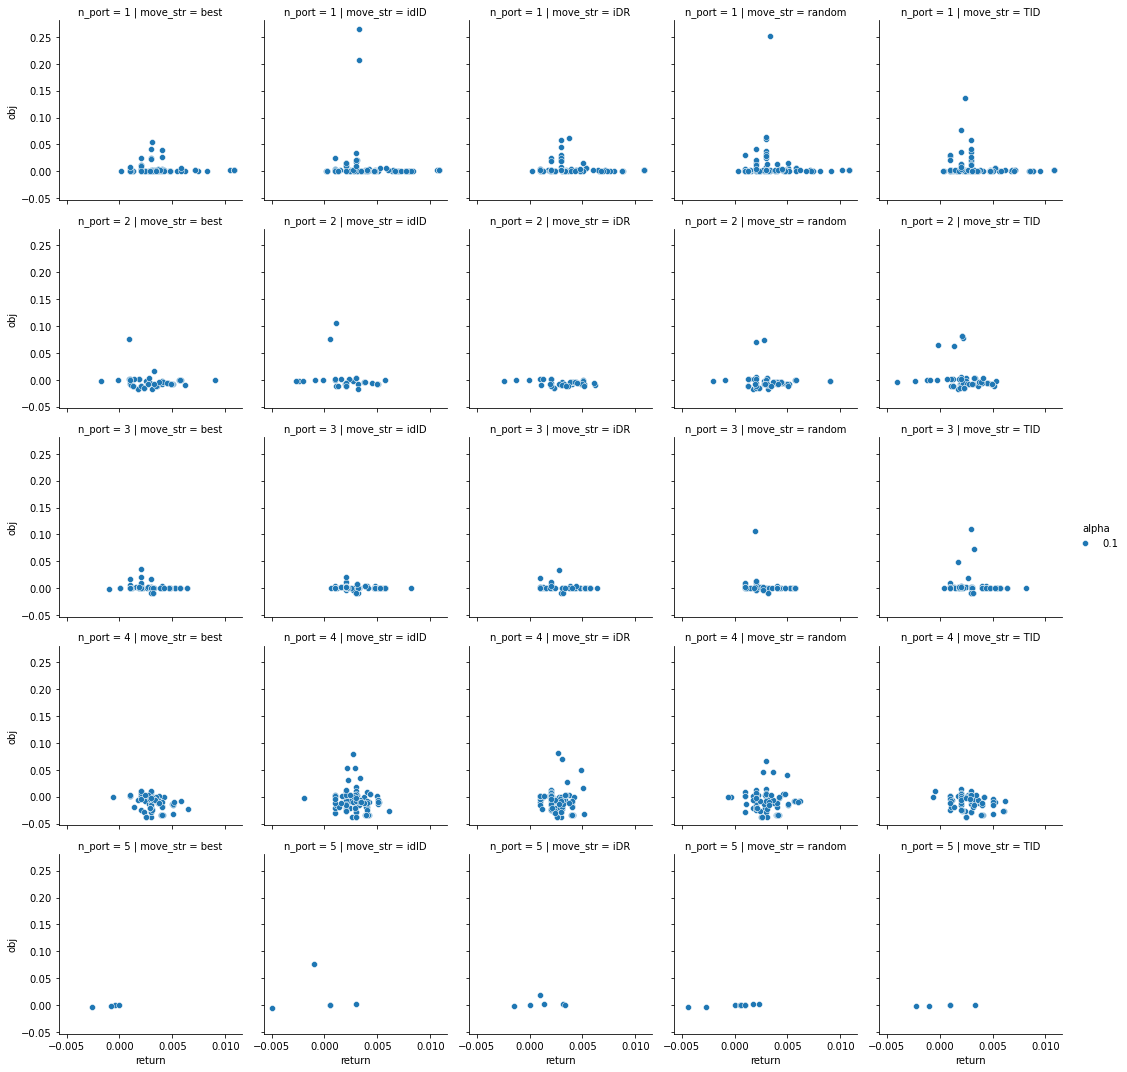

In [47]:
g = sns.FacetGrid(data=best_data, col='move_str', row='n_port', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

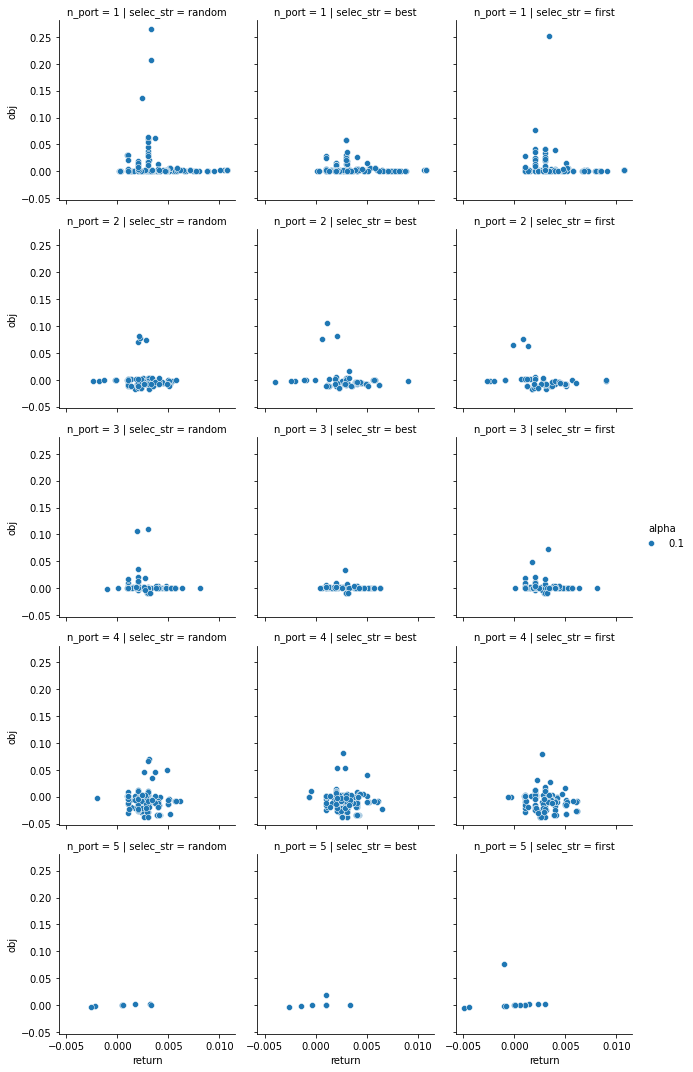

In [48]:
g = sns.FacetGrid(data=best_data, col='selec_str', row='n_port', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

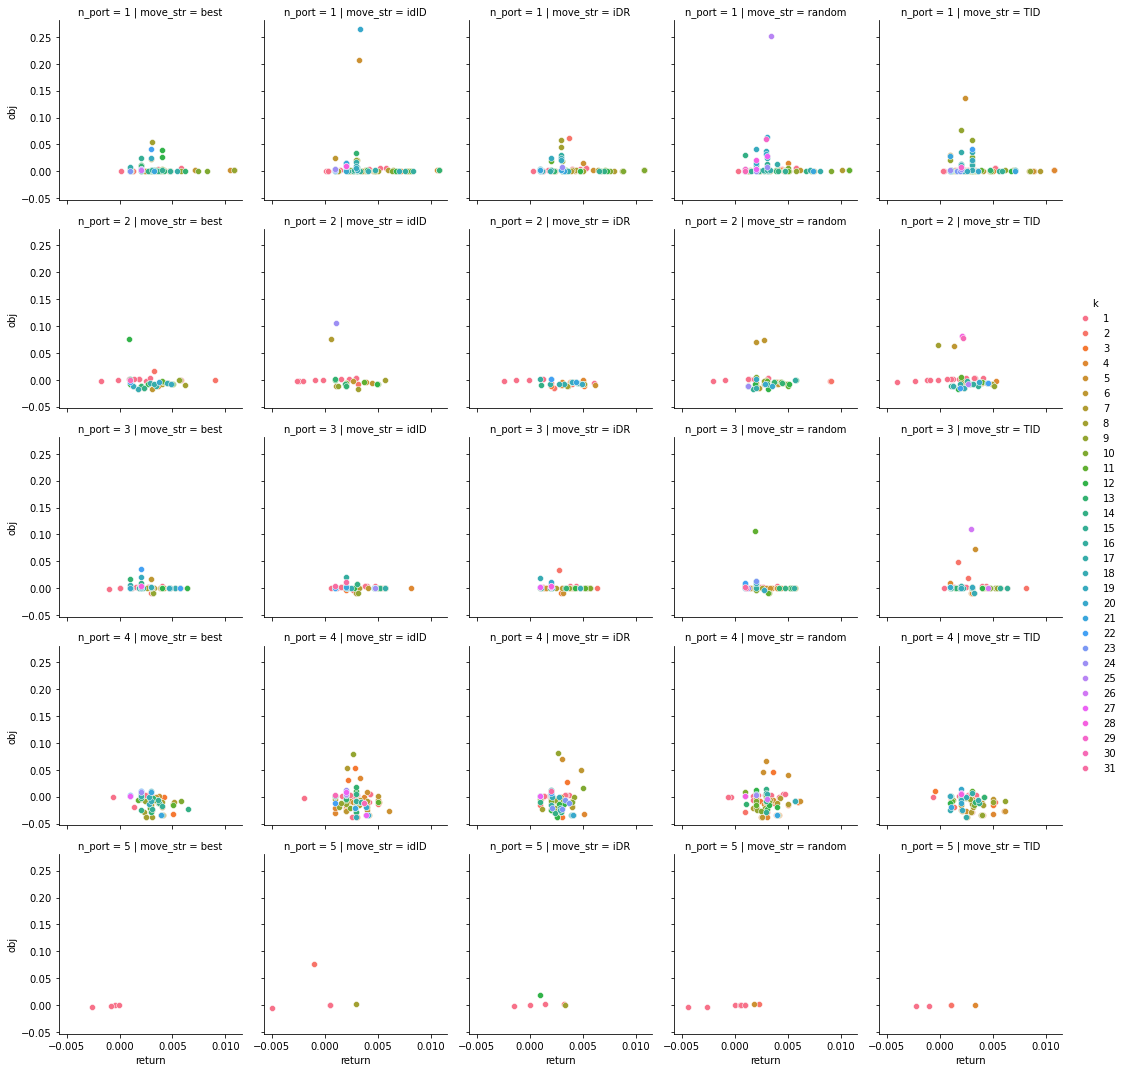

In [49]:
g = sns.FacetGrid(data=best_data, col='move_str', row='n_port', hue='k')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [31]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1639.0,299.000000,0.000000e+00,299.000000,299.000000,299.000000,299.000000,299.000000
obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
aug_obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
return,1639.0,0.003273,2.066357e-03,-0.004928,0.002005,0.003006,0.004470,0.010780
max_iter,1639.0,300.000000,0.000000e+00,300.000000,300.000000,300.000000,300.000000,300.000000
neighbours,1639.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.000000
alpha,1639.0,0.100000,1.388202e-17,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1639.0,0.002666,1.822134e-03,0.001000,0.001000,0.002000,0.003000,0.010000
n_port,1639.0,2.491153,1.251037e+00,1.000000,1.000000,3.000000,4.000000,5.000000
k,1639.0,9.063453,6.704444e+00,1.000000,3.000000,8.000000,13.000000,31.000000


In [32]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [33]:
uef[uef.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_return,2000.0,0.006825,0.002334,0.002784,0.004804,0.006825,0.008845,0.010865
var_return,2000.0,0.001579,0.001116,0.000642,0.000716,0.001058,0.002150,0.004776
port,2000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'mean_return')

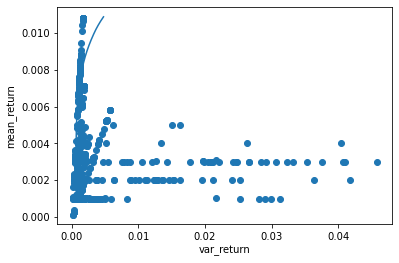

In [50]:
data = best_data[best_data['obj']<0.05]
data = data[data.n_port==1]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [35]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1639.0,299.000000,0.000000e+00,299.000000,299.000000,299.000000,299.000000,299.000000
obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
aug_obj,1639.0,-0.000530,1.859721e-02,-0.038199,-0.006226,0.000494,0.001709,0.265454
return,1639.0,0.003273,2.066357e-03,-0.004928,0.002005,0.003006,0.004470,0.010780
max_iter,1639.0,300.000000,0.000000e+00,300.000000,300.000000,300.000000,300.000000,300.000000
neighbours,1639.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.000000
alpha,1639.0,0.100000,1.388202e-17,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1639.0,0.002666,1.822134e-03,0.001000,0.001000,0.002000,0.003000,0.010000
n_port,1639.0,2.491153,1.251037e+00,1.000000,1.000000,3.000000,4.000000,5.000000
k,1639.0,9.063453,6.704444e+00,1.000000,3.000000,8.000000,13.000000,31.000000


In [52]:
best_data['min_obj'] = best_data.groupby(['exp_return', 'k'])['obj'].transform(min)
best_best_data = best_data[best_data.obj==best_data.min_obj]
print(best_best_data.shape)

(154, 18)


Text(0, 0.5, 'mean_return')

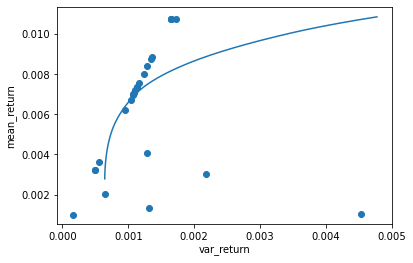

In [58]:
port = 1
data = best_best_data[best_best_data.n_port==port]
data = data[data['obj']<0.005]
plt.plot(uef[uef.port==port].var_return, uef[uef.port==port].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

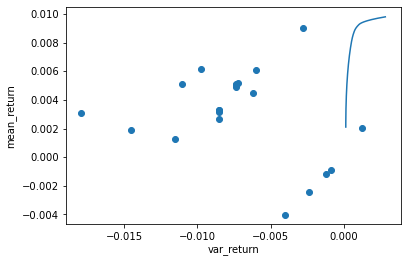

In [59]:
port = 2
data = best_best_data[best_best_data.n_port==port]
data = data[data['obj']<0.005]
plt.plot(uef[uef.port==port].var_return, uef[uef.port==port].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

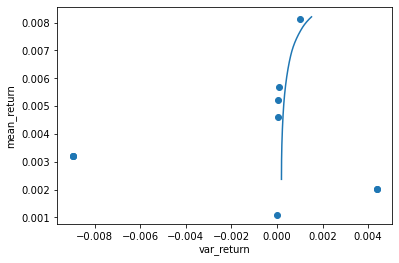

In [60]:
port = 3
data = best_best_data[best_best_data.n_port==port]
data = data[data['obj']<0.005]
plt.plot(uef[uef.port==port].var_return, uef[uef.port==port].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

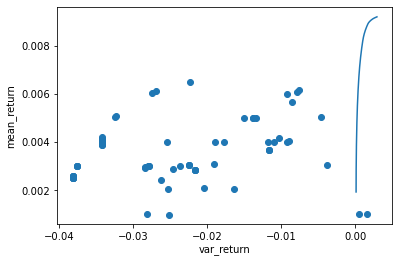

In [61]:
port = 4
data = best_best_data[best_best_data.n_port==port]
data = data[data['obj']<0.005]
plt.plot(uef[uef.port==port].var_return, uef[uef.port==port].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

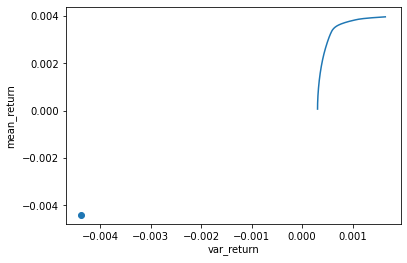

In [62]:
port = 5
data = best_best_data[best_best_data.n_port==port]
data = data[data['obj']<0.005]
plt.plot(uef[uef.port==port].var_return, uef[uef.port==port].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [40]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .count()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return          0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  \
move_str selec_str                                                           
TID      best        37.0   32.0   24.0    9.0    4.0    2.0    3.0    3.0   
         first       28.0   32.0   21.0    9.0    7.0    6.0    1.0    2.0   
         random      43.0   28.0   20.0    8.0    6.0    3.0    3.0    2.0   
best     best        26.0   31.0   22.0    7.0    3.0    2.0    1.0    2.0   
         first       35.0   35.0   26.0   10.0    6.0    4.0    3.0    2.0   
         random      26.0   31.0   17.0    6.0    5.0    4.0    3.0    1.0   
iDR      best        32.0   27.0   25.0   10.0    4.0    4.0    4.0    1.0   
         first       34.0   27.0   22.0    5.0    6.0    2.0    2.0    2.0   
         random      31.0   24.0   20.0   13.0    8.0    3.0    NaN    NaN   
idID     best        27.0   34.0   20.0    7.0    9.0    6.0    4.0    NaN   
         first       29.0   24.0   27.0    9.0    4.0    3.0    2.0    1.0   
         random      34.0   46.0   19.0   12.0   10.0    3.0    2.0    3.0   
random   best        31.0   28.0   17.0    8.0    3.0    8.0    4.0    1.0   
         first       48.0   32.0   18.0    5.0    3.0    3.0    3.0    NaN   
         random      31.0   33.0   23.0   16.0    8.0    3.0    3.0    NaN   

exp_return          0.009  0.010  
move_str selec_str                
TID      best         2.0    NaN  
         first        2.0    NaN  
         random       NaN    1.0  
best     best         1.0    NaN  
         first        1.0    NaN  
         random       1.0    NaN  
iDR      best         1.0    1.0  
         first        2.0    3.0  
         random       2.0    1.0  
idID     best         1.0    NaN  
         first        3.0    NaN  
         random       1.0    NaN  
random   best         3.0    1.0  
         first        1.0    NaN  
         random       NaN    NaN

In [41]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .min()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return             0.001     0.002     0.003     0.004     0.005  \
move_str selec_str                                                     
TID      best      -0.038199 -0.034257 -0.018927 -0.015493 -0.009491   
         first     -0.038199 -0.038197 -0.013439  0.000743 -0.032332   
         random    -0.034256 -0.034256 -0.027917 -0.015467 -0.004598   
best     best      -0.034257 -0.034246 -0.022506 -0.007126 -0.007346   
         first     -0.038199 -0.038195 -0.025761 -0.017757 -0.032441   
         random    -0.034244 -0.021612 -0.037652 -0.018942 -0.013837   
iDR      best      -0.034257 -0.038196 -0.037621 -0.009223 -0.011021   
         first     -0.034240 -0.028476 -0.018708 -0.008898 -0.007350   
         random    -0.034257 -0.028468 -0.034257 -0.034220 -0.032121   
idID     best      -0.034243 -0.034257 -0.027952  0.000069 -0.009450   
         first     -0.038192 -0.034247 -0.037654 -0.025369 -0.007308   
         random    -0.034255 -0.034254 -0.037584 -0.034183 -0.013433   
random   best      -0.022026 -0.034256 -0.037618 -0.034222  0.001130   
         first     -0.038198 -0.038194 -0.023729 -0.008175 -0.015063   
         random    -0.038188 -0.034245 -0.010468 -0.034220 -0.013795   

exp_return             0.006     0.007     0.008     0.009     0.010  
move_str selec_str                                                    
TID      best       0.001368 -0.001192  0.002299 -0.004002       NaN  
         first     -0.027494  0.001021  0.003050  0.001654       NaN  
         random    -0.002344  0.001726 -0.000203       NaN  0.002690  
best     best      -0.009752  0.002645  0.000141  0.001855       NaN  
         first      0.001654 -0.000622  0.002832 -0.000813       NaN  
         random    -0.001765  0.001130  0.001821  0.002437       NaN  
iDR      best      -0.009738 -0.000037  0.001379  0.005294  0.005294  
         first     -0.005994  0.003445  0.003310  0.001873  0.001654  
         random    -0.001319       NaN       NaN  0.001655  0.001309  
idID     best       0.001487  0.000651       NaN  0.001993       NaN  
         first     -0.026930  0.002838 -0.000863 -0.002646       NaN  
         random     0.001021 -0.000130  0.000282 -0.001980       NaN  
random   best      -0.009236 -0.000622  0.004033 -0.001435  0.005817  
         first     -0.009265  0.001104       NaN -0.002782       NaN  
         random    -0.007660  0.001749       NaN       NaN       NaN

In [42]:
best_best_data = best_data.groupby(['exp_return'], as_index=False)['obj'].min()
print(best_best_data.shape)
best_best_data.head()

(10, 2)


,exp_return,obj
0,0.001,-0.038199
1,0.002,-0.038197
2,0.003,-0.037654
3,0.004,-0.034222
4,0.005,-0.032441


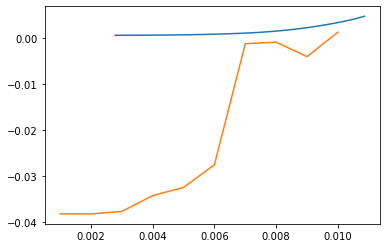

In [43]:
plt.plot(uef[uef.port==1].mean_return, uef[uef.port==1].var_return)
plt.plot(best_best_data.exp_return, best_best_data.obj)